## Introduction

This tutorial will introduce how recommender system work. Given a user's past behavior, we would want to predict what other things the same user would like. It is a common problem faced by many e-commerce platforms. In this tutorial, I will discuss content filtering and collaborative filtering approach which is motivated by the idea that you will probably like things people with similar purchasing behavior like. I will use a Steam users' dataset to explain the Alternating Least Sqaures algorithm and introduce the Sklearn method at the end.

We will cover the following topics in this tutorial:
- [Content Filtering Vs Collaborative Filtering](#Content-Filtering-Vs-Collaborative-Filtering)
- [Matrix Factorization](#Matrix-Factorization)
- [Data Preparation](#Data-Preparation)
- [Modelling](#Modelling)
- [Sklearn](#Sklearn-Package)
- [Summary and References](#Summary-and-References)

### Content Filtering Vs Collaborative Filtering
#### Content Filtering
One of the approaches for a recommender system is content filtering. We can collect preference of the users and information about products to figure out the strength of the connections between users and products. For example, we can ask people to rank the top few video games' categories and use the category information of the video games to figure out which game to recommend to the user. 

_User Preference Table:_

|UserID|RolePlay|Strategy|Action|Simulation|Sports|Puzzle|
|------|--------|--------|------|----------|------|------|
|1     |4       |1       |0     |2         |0     |3     |
|2     |2       |0       |4     |1         |3     |0     |
|3     |4       |1       |2     |0         |0     |3     |
|...   |...     |...     |...   |...       |...   |...   |
|N     |0       |0       |2     |4         |3     |2     |

_Game Category Table:_

|GameID|RolePlay|Strategy|Action|Simulation|Sports|Puzzle|
|------|--------|--------|------|----------|------|------|
|1     |1       |1       |0     |0         |0     |1     |
|2     |0       |1       |1     |0         |0     |0     |
|3     |0       |0       |1     |0         |1     |0     |
|...   |...     |...     |...   |...       |...   |...   |
|M     |0       |0       |1     |0         |0     |0     |

We can get users' preference score by taking the inner product of the rows of the two table. For user i with preference of $\mathbf{x_i}$ ($1 \times d$), the preference score for game j with characteristics $\mathbf{g_j}$ ($1 \times d$) is:
$$\mathbf{x_i} \cdot \mathbf{g_j}^T = \sum_{d} x_{id}g_{dj} $$

For example, for UserID_1 with preference of RolePlay, Puzzle, Simulation and Strategy (higher value indicates stronger preference), he/her preference score for all the games are: 

$$ \begin{pmatrix}4&1&0&2&0&3\end{pmatrix} \cdot GameMatrix^T = \begin{pmatrix} 8 \\ 1 \\ 1 \\... \\ 0 \end{pmatrix} $$ 

So based on content filtering, User 1 is more likely to like Game 1 compared to Game 2 and 3. However, the problem is that this estimation is too simple and not very accurate as there are definitely more relevant features that can influence a user's preference such as price and reviews. We can try to include these features in the data but we will burden the user for many questions. Furthermore, sometimes, users themselves cannot explain their preference either. Thus, we need other approach such as collaborative filtering.


#### Collaborative Filtering
Collaborative filtering approach is motivated by the idea that you will probably like things people with similar purchasing behavior like. Instead of using the features data to generate the preference matrix, we can use the preference data we have, such as user's rating to generate the features. For example, we may have users' ratings for different video games as below. 

|        |GameID_1|GameID_2|GameID_3|GameID_4  |...       |GameID_M|
|--------|--------|--------|------  |----------|----------|------  |
|UserID_1|?       |3       |?       |2         |...       |2       |
|UserID_2|4       |3       |1       |2         |...       |?       |
|UserID_3|?       |4       |2       |?         |...       |1       |
|...     |...     |...     |...     |...       |...       |...     |
|UserID_N|?       |2       |?       |3         |...       |3       |

We assume these ratings are determined by a small number of feat
ures D.

$$ RatingMatrix = \begin{bmatrix} U_{11}& ... & U_{1d} \\ U_{21} & ... & U_{2d} \\\vdots & \ddots  & \vdots  \\ U_{n1} & ... & U_{nd}\end{bmatrix} \begin{bmatrix} G_{11}& G_{12}& ... & G_{1m} \\\vdots & \vdots & \ddots & \vdots \\\ G_{d1} &  G_{d2} & ... & G_{dm}\end{bmatrix}$$

We will try to guess values for these feature matrices U and G to match the value that is already in the table as closely as possible so that we can find the missing ratings using U and G matrices. As we do not know what these features exactly are, we will call the features **Latent Features**. They are the underlying patterns of the data.

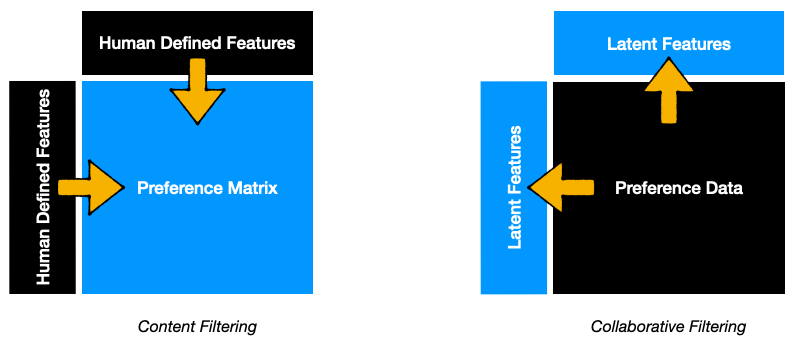

### Matrix Factorization

To get the latent features, we need to decompose the large matrix (preference matrix) to two matrices. One matrix can d features that describe the users. Another matrix have games that can also be described by d features. However, we do not know the explicit meaning of the features. After learning the two smaller matrices, we can perform matrix multiplication like content filtering to get our estimation of users' ratings of the games. The estimated rating of user i for game j is:

$$\hat{r}_{ij} = \mathbf{u}_i \cdot \mathbf{g}_j^T = \sum_{d} u_{id}g_{dj} $$



<div>
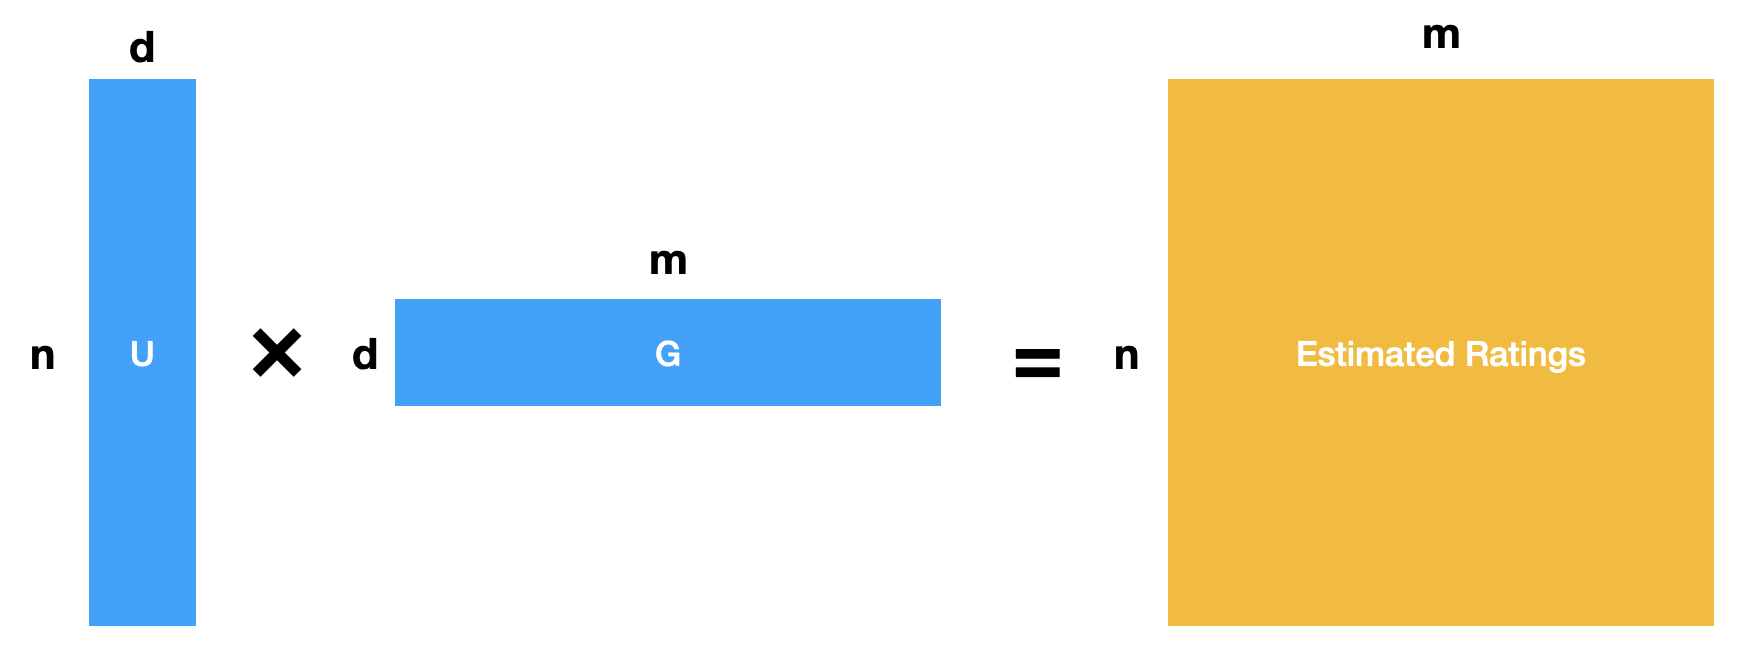
</div>

#### Alternative Least Sqaures
Given the preference data, we can use **Alternative Least Squares** algorithm to learn user matrix U and game matrix G. Like many machine learning algorithms, we will need to minimize the objective function which is the square of the difference between true ratings and predicted ratings. The objective function is:

$$L = \sum_{i=0}^{n} \sum_{j=0}^{m}(r_{ij} - \mathbf{u}_i \mathbf{g}_j^T)^2$$
$$= \sum_{i=0}^{n} \sum_{j=0}^{m}(r_{ji} - \mathbf{g}_j \mathbf{u}_i^T)^2$$

Alternative Least Squares method will treat one latent feature matrix as constant to update the other latent feature matrix. In the next round, we hold the updated latent feature as constant and update the first latent feature matrix. We will execute this two-step process until it converge. The derivative of the loss function with respect to $\mathbf{u}_i$ with closed form solution is:

$$\frac{\partial L}{\partial \mathbf{u}_i} = -2\sum_{j=0}^{m}(r_{ij} - \mathbf{u}_i \mathbf{g}_j^T)\mathbf{g}_j$$
$$=-2(\mathbf{r}_i - \mathbf{u}_iG^T)G = 0$$
$$\mathbf{r}_iG = \mathbf{u}_iG^TG$$
$$\mathbf{u}_i = \mathbf{r}_iG(G^TG)^{-1}$$

The derivative of the loss function with respect to $\mathbf{g}_j$ with closed form solution is:

$$\frac{\partial L}{\partial \mathbf{g}_j} = -2\sum_{i=0}^{n}(r_{ji} - \mathbf{g}_j \mathbf{u}_i^T)\mathbf{u}_i$$
$$=-2(\mathbf{r}_j - \mathbf{g}_jU^T)U = 0$$
$$\mathbf{r}_jU = \mathbf{g}_jU^TU$$
$$\mathbf{g}_j = \mathbf{r}_jU(U^TU)^{-1}$$

### Data Preparation

To implement the algorithm, I will use the $\href{http://cseweb.ucsd.edu/~jmcauley/datasets.html#steam_data}{Steam Video Games Data}$ 's User and Item Dataset. The dataset contains the following columns:

| Column | Sample | Description | Type/Values |
| --- |:--- |:--- |:--- |
| user_id | js41637 | id of the user| object |
| items_count | 888 | number of items played in items list | integer |
| steam_id    | 76561198035864385   | id of the user's steam account | object     |
| user_url | http://steamcommunity.com/id/js41637 | url of the user's steam account | object |
| items | [{'item_id': '10', 'item_name': 'Counter-Strike','playtime_forever': 0,'playtime_2weeks': 0},{'item_id': '80', 'item_name': 'Counter-Strike: Condition Zero','playtime_forever': 0,'playtime_2weeks': 0},...] | list of items user has | list |

In [1]:
# Import packages
import pandas as pd
import gzip
import numpy as np
import matplotlib.pyplot as plt
import json

Download the "australian_users_items.json.gz" from https://github.com/siyuanl3/PracticalDataScience and put the file into the same folder of the tutorial to run the following code.

In [35]:
# Load the data
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

raw_df = getDF('australian_users_items.json.gz') 
raw_df.head()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


Process the data to remove unplayed items. To limit the size of the dataset, I will only take games that are played more than 200 hours. I will also limit the users who played at least 100 games in the following example.

In [36]:
# Limit the dataset size
df = raw_df

def flat_dict_list(l):
    result = []
    for dic in l:
        if dic['playtime_forever'] > 200:
            result.append((int(dic['item_id']), dic['item_name']))
    return result

df['item_ids'] = df['items'].apply(flat_dict_list)
df['count'] = df['item_ids'].apply(lambda x: len(x))
df = df[df['count'] > 100]
print(len(df))
df.head()

1388


,user_id,items_count,steam_id,user_url,items,item_ids,count
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...","[(300, Day of Defeat: Source), (240, Counter-S...",111
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik...","[(300, Day of Defeat: Source), (4000, Garry's ...",260
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea...","[(300, Day of Defeat: Source), (130, Half-Life...",179
5,MinxIsBetterThanPotatoes,371,76561198004744620,http://steamcommunity.com/id/MinxIsBetterThanP...,"[{'item_id': '50', 'item_name': 'Half-Life: Op...","[(50, Half-Life: Opposing Force), (320, Half-L...",125
8,maplemage,629,76561198026584251,http://steamcommunity.com/id/maplemage,"[{'item_id': '240', 'item_name': 'Counter-Stri...","[(240, Counter-Strike: Source), (300, Day of D...",169


Get the preference data. To obtain user's rating of the game, I will use the "playtime_forever" time as a measurement of likness. The longer the user plays the game, the higher the rating the user will give to the game. Normalize the 'ratings' to 0-1 for each user.

In [37]:
# Get total number of games 
ids = []
for i in range(len(df)):
    ids += df.iloc[i]['item_ids']
m_games = len(set(ids))
print(m_games)

# Get total number of users
n_users = df['user_id'].unique().shape[0]
print(n_users)

6947
1363


In [38]:
# Create a games-index dictionary and a user-index dictionary
games_dict = dict(zip(set(ids), range(m_games)))
user_dict = dict(zip(df['user_id'].unique(), range(n_users)))

In [39]:
# Create the rating table
ratings = np.zeros((n_users, m_games))
for i in range(len(df)):
    row = df.iloc[i]
    row_idx = user_dict[row['user_id']]
    for j in row['items']:
        if j['playtime_forever'] > 200:
            col_idx = games_dict[(int(j['item_id']), j['item_name'])]
            ratings[row_idx, col_idx] = j['playtime_forever']

In [40]:
# Normalized the 'rating' for each user
normal_rating = ratings/ratings.sum(axis=1)[:,None]

In [41]:
# Calculate the sparcity of the rating matrix
total = n_users * m_games
non_zeros = len(np.flatnonzero(normal_rating))
sparsity = (non_zeros/total) * 100
print(sparsity)

2.2942389189039623


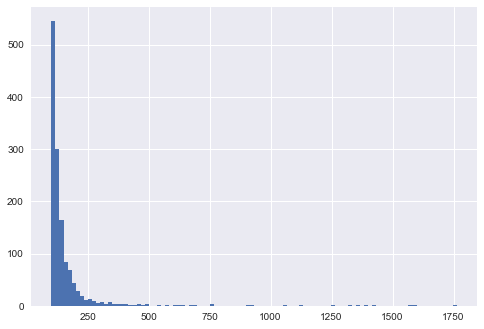

In [42]:
# Plot the histgram of number of ratings of each user
plt.style.use('seaborn')
plt.hist(np.sum(normal_rating != 0, axis = 1), bins = 100)
plt.show()

### Modelling
There are 1363 unique users and 6947 unique games. For the ratings matrix, only 2.29% of the cells have values. The other 0 ratings are missing values we want to predict. The rule of thumb for the sparsity of matrix of recommendation system should be at least 1%. If the data is too sparse, it is hard to perform the modelling.

After preprocessing the data, we need to split the dataset into training and testing set. We cannot randomly select users or games to be test set as we need all users and games to be available to train the model. So we randomly select some observed ratings in the table and learn a model without these ratings. We will evaluate our model by comparing the predicted ratings and true ratings of these cells. According to our data preparing process, each user will have at least 100 games' rating. We will remove 20 of the games' ratings for each user and assign these ratings as test set.

In [43]:
# Create train set and test set
test = np.zeros(normal_rating.shape)
train = normal_rating.copy()
for i in range(n_users):
    test_idx = np.random.choice(np.flatnonzero(normal_rating[i]), size = 20)
    for idx in test_idx:
        train[i, idx] = 0
        test[i, idx] = normal_rating[i, idx]

The **Alternative Least Sqaures** alogrithm is:
1. Initalize U and G randomly
2. Fix U to solve G (similar to closed form solution of linear regression)
3. Fix G to solve U (similar to closed form solution of linear regression)
4. Repeat 2 and 3 until convergence

The hyperparameter of the model is the dimension **d** of the latent features.

In [44]:
# ALS algorithm implementations:
def get_model(train, test, d, iteration):
    n_users, m_games = train.shape
    U = np.random.random((n_users, d))
    G = np.random.random((m_games, d))
    i = 0
    train_mse = []
    test_mse = []
    while i < iteration:
        # fix G to update U
        GTG = G.T.dot(G)
        GTG_inv = np.linalg.inv(GTG)
        U = (train.dot(G)).dot(GTG_inv)
        
        # fix U to update G
        UTU = U.T.dot(U)
        UTU_inv = np.linalg.inv(UTU)
        G = (train.T.dot(U)).dot(UTU_inv)
        
        # prediction of the updated U and G
        pred = U.dot(G.T)
        train_mse.append(compute_error(pred, train))
        test_mse.append(compute_error(pred, test))
        i += 1
    
    return U, G, train_mse, test_mse
        
def compute_error(pred_matrix, true_matrix):
    mask = np.nonzero(true_matrix)
    true_values = true_matrix[mask]
    pred_values = pred_matrix[mask]
    mse = np.sum(np.square(true_values - pred_values))/len(true_values)
    return mse

In [59]:
# model with train and test dataset
U, G, train_mse, test_mse = get_model(train, test, 50, 200)

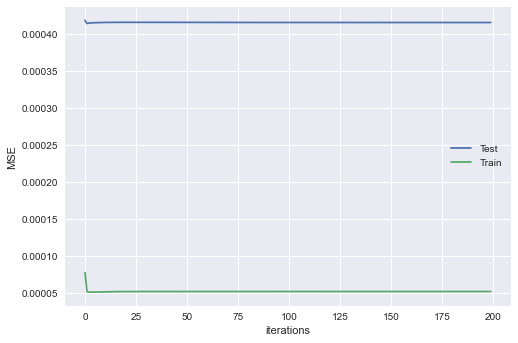

In [60]:
# plot the train and test mean sqaure error
plt.plot(test_mse, label = 'Test')
plt.plot(train_mse, label = 'Train')
plt.xlabel('iterations')
plt.ylabel('MSE')
plt.legend(loc = 'best')
plt.show()

To prevent overfitting, we can also add the regularization terms into the loss function. 

$$L = \sum_{i=0}^{n} \sum_{j=0}^{m}(r_{ij} - \mathbf{u}_i \mathbf{g}_j^T)^2 + \lambda (\sum_{i=0}^{n}\|\mathbf{u}_i\|^2 + \sum_{j=0}^{m}\|\mathbf{g}_j\|^2)$$

### Sklearn Package
We can estimate U and G directly using the method non_negative_factorization (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.non_negative_factorization.html) in sklearn package. 

In [49]:
from sklearn.decomposition import non_negative_factorization
# n_components is the d defined previously
# we initialize the matrix randomly
# l1_ration = 0 which means the penalty is an elementwise L2 penalty
W, H, n_iter = non_negative_factorization(train, n_components=20, init='random', random_state=0, l1_ratio = 0, max_iter=500)

In [50]:
pred = W.dot(H)
train_mse = compute_error(pred, train)
test_mse = compute_error(pred, test)
print("Train Mean Sqaured Error: " + str(train_mse))
print("Test Mean Sqaured Error: " + str(test_mse))

Train Mean Sqaured Error: 9.62143170312539e-05
Test Mean Sqaured Error: 0.00040622603505629856


### Summary and References
The recommendation system using collaborative filtering is powerful as we do not need domain knowledge to explictly create the features. The model will automatically learn the underlying patterns. However, we still face some challenges in real life datasets. Firstly, some users never or rarely give ratings, we will need to use other relevant features to approximate his/her preference (In this dataset, we assumed that the preference of user is related to the number of hours the user played.) Even with these information, the matrix could be too sparse to provide a good model. Secondly, the model works only for current users and items. For new users and items, we do not have any information. This is the **cold-start problem**. More techniques are required to solve this problem. 

- Dataset Link: https://cseweb.ucsd.edu/~jmcauley/datasets.html#steam_data
- Sklearn Method Link: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.non_negative_factorization.html